In [3]:
from functions import *
from skimage import img_as_bool, io, color, morphology

In [4]:
path_imgs = "data_dm/train_data/images/"
path_gts = "data_dm/train_data/ground-truth/"

In [5]:
initDirectory(path_imgs)
initDirectory(path_gts)

In [6]:
train_samples = 500
thickness = (1,7)
sample_fibers = (2,20)
sample_size = (128, 128)

createSamples(path_imgs, sample_size, train_samples, thickness, sample_fibers, "jpg", False)

In [7]:
import glob

img_paths = []
#for path in path_sets:
for img_path in glob.glob(os.path.join(path_imgs, '*.jpg')):
    img_paths.append(img_path)

In [8]:
import cv2
import h5py

for img_path in img_paths:
    image = img_as_bool(color.rgb2gray(io.imread(img_path)))
    skeleton, distance = morphology.medial_axis(image, mask=None, return_distance=True)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
        hf['density'] = distance

/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


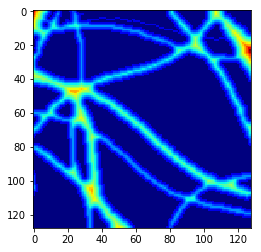

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm as CM

gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])

plt.imshow(groundtruth,cmap=CM.jet)

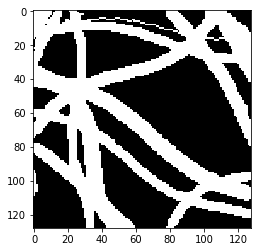

In [13]:
_img = img_as_bool(color.rgb2gray(io.imread(img_paths[0])))
plt.imshow(_img, CM.gray)

In [15]:
import json

# generamos los archivos json de lectura para el entrenamiento
img_paths_train = []
img_paths_val = []

c = 0
for img_path in glob.glob(os.path.join(path_imgs, '*.jpg')):
    if c>=400:
        img_paths_val.append(img_path)
    else:
        img_paths_train.append(img_path)
    c+=1

with open('../demo/train.json', 'w') as f:
    json.dump(img_paths_train, f)
    
with open('../demo/val.json', 'w') as f:
    json.dump(img_paths_val, f)